# Homework 2

## Reading The Data

In [1]:
library(dplyr)
library(readr)
library(ggplot2)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




In [2]:
apartment_prices_df <- read.csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/Booli_sold.csv', fileEncoding = 'UTF-8')
swe_election_df <- read_delim('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/2018_R_per_kommun.csv', 
                            delim = ';', locale = locale(encoding = 'UTF-8', decimal_mark = ','), show_col_types = FALSE)
stroke_df <- read.csv('https://raw.githubusercontent.com/su-mt4007/data/refs/heads/main/stroke-data.csv')

# Apartment Prices
We start refining the dataframe by selecting the relevant variables and then creating a new variable that calculates the price per square meter (ppsqm).

In [3]:
relevant_apartment_prices_df <- apartment_prices_df %>%
    select(soldPrice, livingArea, soldDate, location.address.streetAddress) %>%
    mutate(ppsqm = soldPrice / livingArea)

Now we can rank the top 5 most expensive apartments (w.r.t ppsqm) by using a sort function.

In [4]:
relevant_apartment_prices_df %>%
    select(location.address.streetAddress, soldDate, ppsqm) %>%
    arrange(desc(ppsqm), .by_group = FALSE) %>%
    slice_head(n = 5)

location.address.streetAddress,soldDate,ppsqm
<chr>,<chr>,<dbl>
Ekhagsvägen 8,2016-01-21,104166.67
Ekhagsvägen 8,2016-06-21,102083.33
Ekhagsvägen 10,2016-04-28,100000.00
Torphagsvägen 4,2017-06-01,88400.00
Docentbacken 1B,2016-04-19,85501.86


Next is to calculate the average ppsqm in Ekhagen.

In [5]:
relevant_apartment_prices_df %>%
    summarize(mean_ppsqm = mean(ppsqm, na.rm = TRUE))

mean_ppsqm
<dbl>
58759.38


Something that I found interesting was that the top three most expensive apartments was sold in the year 2016, indicating that maybe that year was at its most peak. We can rank each year with respect to the average ppsqm and check whether this is true.

In [6]:
library(lubridate)

most_expensive_year <- relevant_apartment_prices_df %>% 
    mutate(soldDate = as.Date(soldDate, format = "%Y-%m-%d"))

most_expensive_year <- relevant_apartment_prices_df %>%
    mutate(year = year(soldDate))

most_expensive_year %>%
    group_by(year) %>%
    summarize(avg_ppsqm = mean(ppsqm, na.rm = TRUE)) %>%
    arrange(desc(avg_ppsqm))


Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union




year,avg_ppsqm
<dbl>,<dbl>
2016,67287.56
2017,66340.71
2018,64213.61
2015,58834.71
2014,50464.61
2012,49030.83
2013,46193.42


The ppsqm did in fact peak in 2016.

# The Swedish Election of 2018
First task is to calculate the total number of legitimate votes in Stockholm during the election. This can be done by firstly create a subset of the original data with `filter()`, and then use `summarize()` together with `sum()`.


In [7]:
stockholm_df <- swe_election_df %>%
    filter(LÄNSNAMN == 'Stockholms län')

stockholm_df %>%
    summarize(legitimate_votes_total = sum(`RÖSTER GILTIGA`, na.rm = TRUE))


legitimate_votes_total
<dbl>
1426237


Next task we want to investigate in which municipality did the Social Democratic Party garner the highest voting percentage. Since the column `S` represents the percentage garnered for a specific municipality, we can just arrange the column in decsending order and then display the top one.

In [8]:
swe_election_df %>%
    select(S, KOMMUNNAMN) %>%
    arrange(desc(S), .by_group = FALSE) %>%
    slice_head(n = 1)

S,KOMMUNNAMN
<dbl>,<chr>
52.18,Munkfors


Lastly, we want to rank the top three municipialities with highest participation and presenting this in the form of a table. Like the previous task, we can use the arrange operation with the `desc()` function, but now on the column `VALDELTAGANDE`, and then display the three first rows using `slice_head(n = 3)`

In [9]:
swe_election_df %>%
    select(KOMMUNNAMN, VALDELTAGANDE) %>%
    arrange(desc(VALDELTAGANDE), .by_group = FALSE) %>%
    slice_head(n = 3)

KOMMUNNAMN,VALDELTAGANDE
<chr>,<dbl>
Lomma,93.86
Habo,93.35
Vellinge,93.13


## Predicting Strokes
I started with doing different plots against the response variable (stroke status). The one I landed on is the boxplot below.

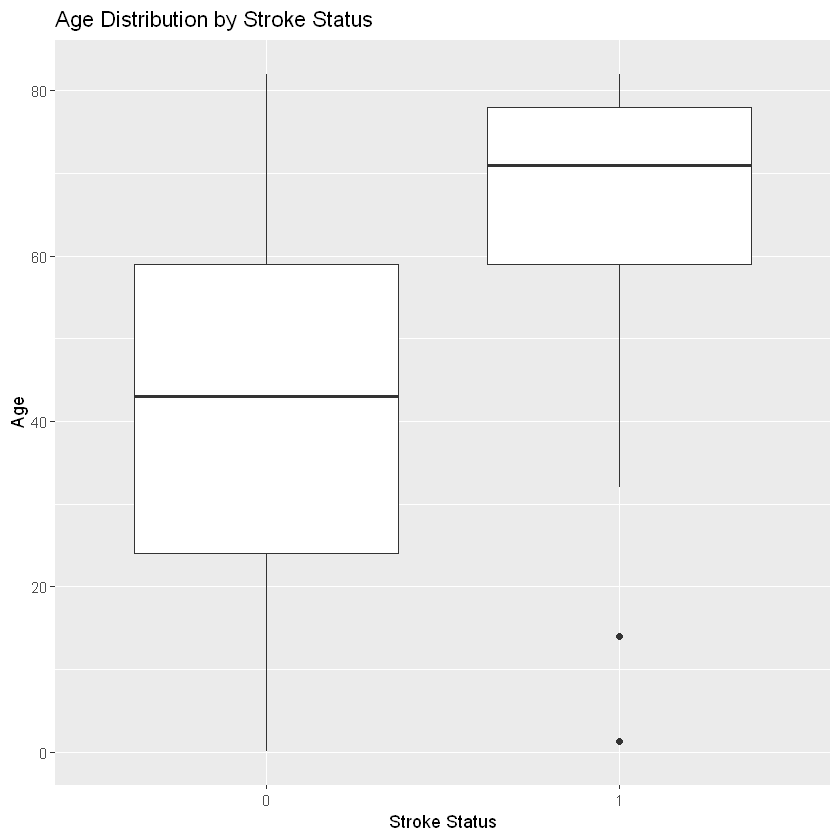

In [10]:
ggplot(stroke_df, aes(x = factor(stroke), y = age)) +
    geom_boxplot() +
    labs(x = "Stroke Status", y = "Age",
         title = "Age Distribution by Stroke Status")

From this boxplot, we can conclude that stroke occurrence is associated with age. As age increases, the likelihood of experiencing a stroke also increases.